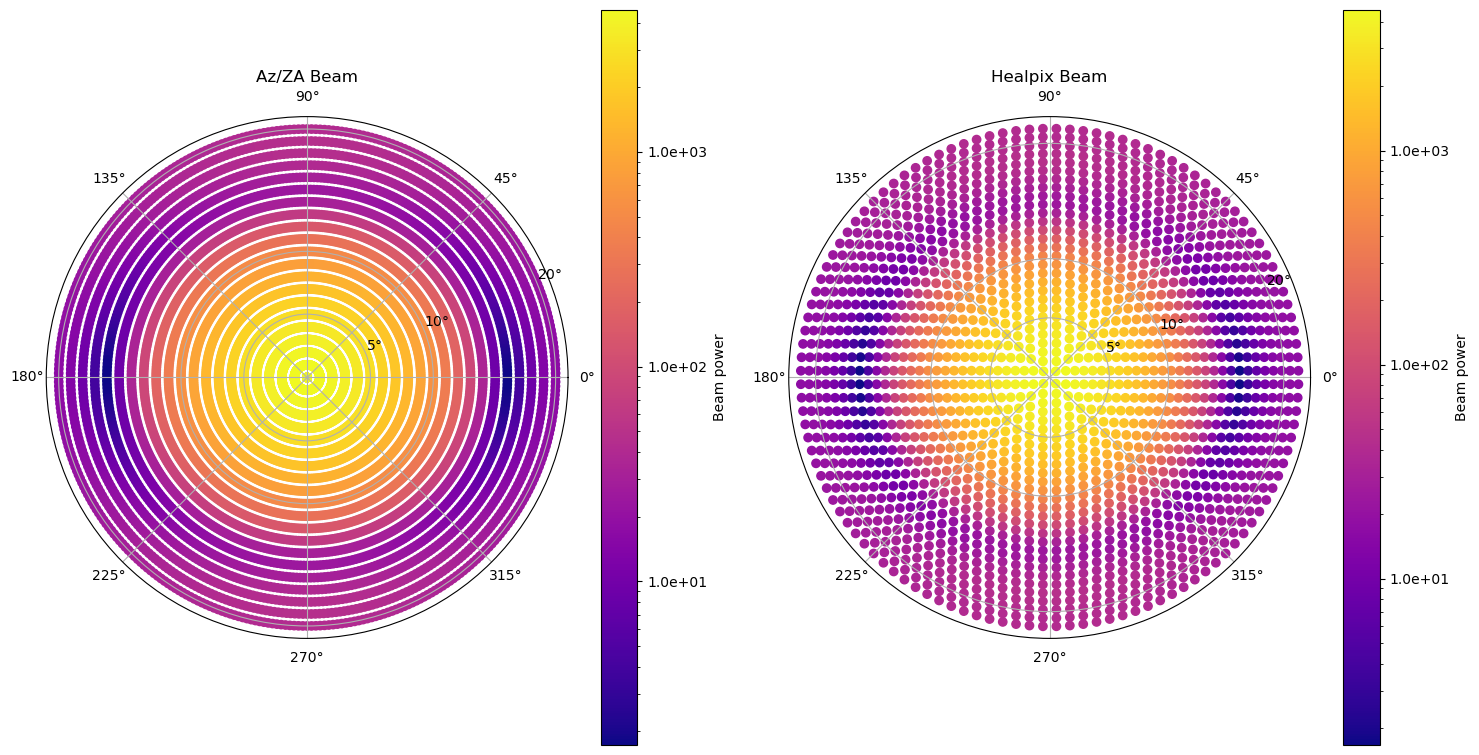

In [1]:

from astropy_healpix import HEALPix
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from pyuvdata import utils, UVBeam
from pyuvdata.datasets import fetch_data

cst_yml_file = fetch_data("hera_fagnoni_dipole_yaml")
beam = UVBeam.from_file(cst_yml_file, beam_type="power")

# Let's cut down to a small area near zenith so we can see the pixelization
za_max = np.deg2rad(20.0)
za_inds_use = np.nonzero(beam.axis2_array <= za_max)[0]
beam.select(axis2_inds=za_inds_use)

# Optionally specify which interpolation function to use.
hpx_beam = beam.to_healpix(inplace=False, interpolation_function="az_za_simple")

# Now plot the pixels on an polar projection with zenith in the center
radial_ticks_deg = [5, 10, 20]

az_array, za_array = np.meshgrid(beam.axis1_array, beam.axis2_array)
az_za_radial_val = np.sin(za_array)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection="polar"), figsize=(15, 15))
ax1.grid(True)
img1 = ax1.scatter(az_array, az_za_radial_val, c=beam.data_array[0,0,0,:], cmap="plasma", norm=LogNorm())
cbar=plt.colorbar(img1, ax=ax1, label="Beam power", orientation="vertical",shrink=.5, format="%4.1e")
_ = ax1.set_yticks(np.sin(np.deg2rad(radial_ticks_deg)))
_ = ax1.set_yticklabels([f"{rt}" + r"$\degree$" for rt in radial_ticks_deg])
_ = ax1.set_title("Az/ZA Beam")

hpx_obj = HEALPix(nside=hpx_beam.nside, order=hpx_beam.ordering)
hpx_lon, hpx_lat = hpx_obj.healpix_to_lonlat(hpx_beam.pixel_array)
za, az = utils.coordinates.hpx_latlon_to_zenithangle_azimuth(hpx_lat.rad, hpx_lon.rad)
hpx_radial_val = np.sin(za)

ax2.grid(True)
img2 = ax2.scatter(az, hpx_radial_val, c=hpx_beam.data_array[0,0,0,:], cmap="plasma", norm=LogNorm())
cbar=plt.colorbar(img2, ax=ax2, label="Beam power", orientation="vertical",shrink=.5, format="%4.1e")

_ = ax2.set_yticks(np.sin(np.deg2rad(radial_ticks_deg)))
_ = ax2.set_yticklabels([f"{rt}" + r"$\degree$" for rt in radial_ticks_deg])
_ = ax2.set_title("Healpix Beam")

fig.tight_layout()
plt.show()
# plt.savefig("Images/hera_orig_healpix.png", bbox_inches="tight", dpi=80)
# plt.clf()

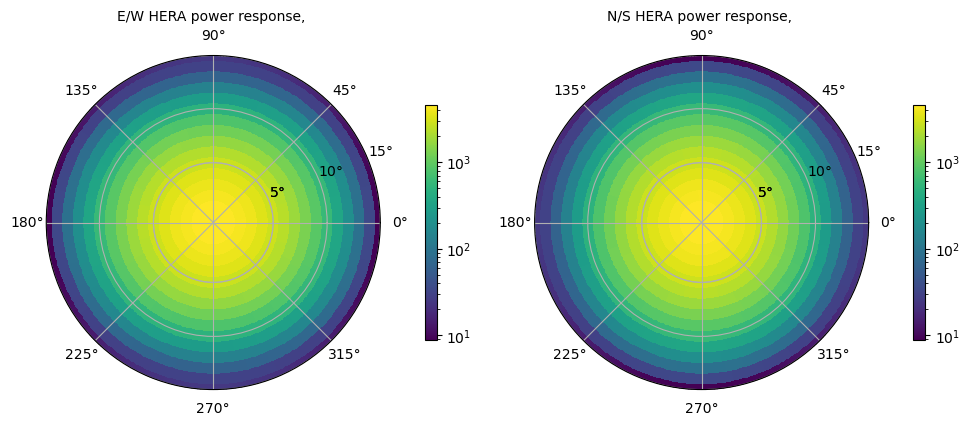

<Figure size 640x480 with 0 Axes>

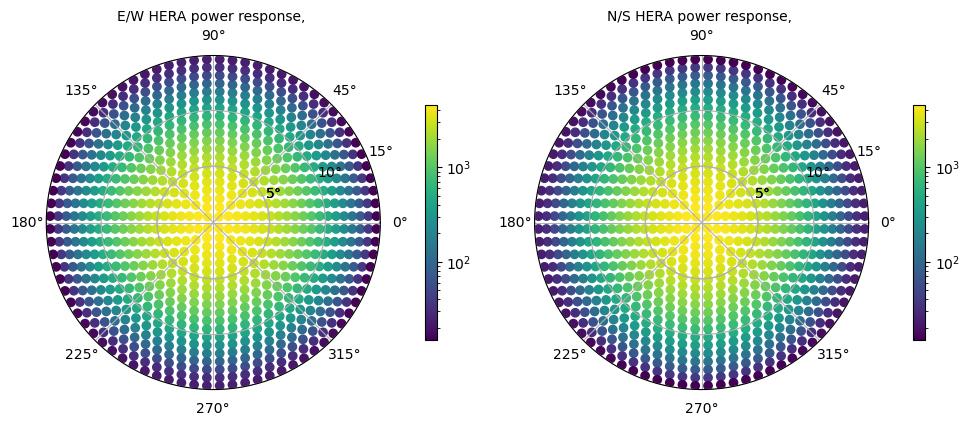

<Figure size 640x480 with 0 Axes>

In [3]:
from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

fetch_data(["hera_fagnoni_dipole_123", "hera_fagnoni_dipole_150"])
cst_yml_file = fetch_data("hera_fagnoni_dipole_yaml")
beam = UVBeam.from_file(cst_yml_file, beam_type="power")

beam.plot(max_zenith_deg=15)

hpx_beam = beam.to_healpix(inplace=False)
hpx_beam.plot(max_zenith_deg=15)
